# Problem - 1

#### Context
CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

## Problem 1 - Define the problem and perform exploratory Data Analysis

### Problem definition

The goal is to develop a machine learning model to predict which political party a voter is likely to support based on their demographic and socio-economic factors.

In [1]:
#Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#load Dataset
data = pd.read_excel("Election_Data.xlsx")
data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


### Check shape, Data types, and statistical summary

In [2]:
data.shape

(1525, 10)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


#### In dataset there was a column named "Unnamed:0" it basic a serial number column which we do not need it for analaysis so we dropping it.

In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


#### Insights
- The dataset has 1525 rows and 10 columns.

- The dataset has 2 categorical variable and 8 numerical variable

- The dataset has column named as "Unnamed: 0" Which seems to be a serial number column which is not required for Analysis, so we decide to drop it.

- Age: The mean age of the participants is 54.18 years, with a standard deviation of 15.71 years. The youngest participant is 24 years old, while the oldest is 93 years old. The median age is 53 years, and 50% of the participants are between 41 and 67 years old.
- Economic conditions (national): The mean score for the perception of national economic conditions is 3.25 on a scale of 1 to 5, with a standard deviation of 0.88. The median score is 3, indicating that most participants perceive the national economic conditions as average. The minimum and maximum scores are 1 and 5, respectively.
- Economic conditions (household): The mean score for the perception of household economic conditions is 3.14 on a scale of 1 to 5, with a standard deviation of 0.93. The median score is 3, indicating that most participants perceive their household economic conditions as average. The minimum and maximum scores are 1 and 5, respectively.
- Opinions on political figures: The mean score for opinions on Tony Blair is 3.33 on a scale of 1 to 5, with a standard deviation of 1.17. The median score is 4, indicating that most participants have a positive opinion of Blair. The mean score for opinions on William Hague is 2.75 on a scale of 1 to 5, with a standard deviation of 1.23. The median score is 2, indicating that most participants have a negative opinion of Hague.
- Attitudes towards Europe: The mean score for attitudes towards Europe is 6.73 on a scale of 1 to 11, with a standard deviation of 3.30. The median score is 6, indicating that most participants have a neutral attitude towards Europe. The minimum and maximum scores are 1 and 11, respectively.
- Political knowledge: The mean score for political knowledge is 1.54 on a scale of 0 to 3, with a standard deviation of 1.08. The median score is 2, indicating that most participants have a moderate level of political knowledge. The minimum score is 0, while the maximum score is 3.

### Univariate analysis

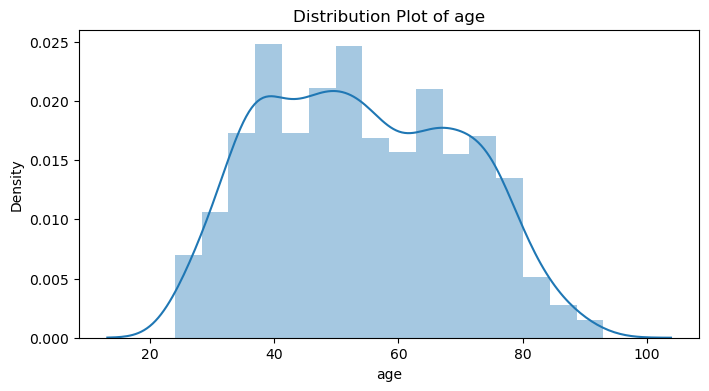

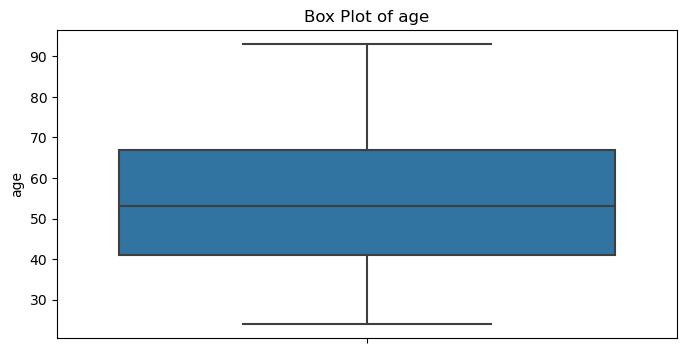

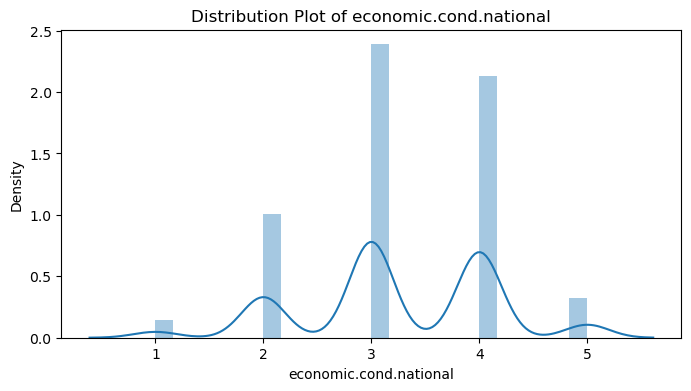

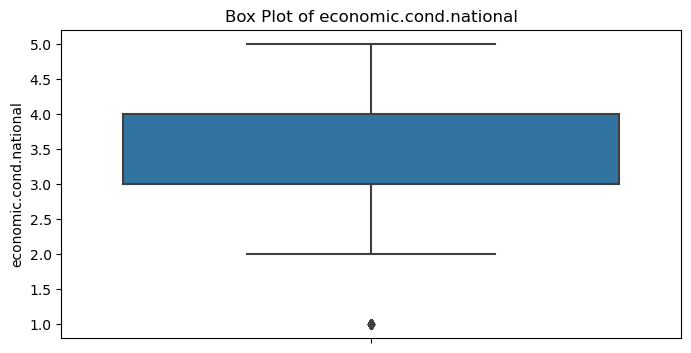

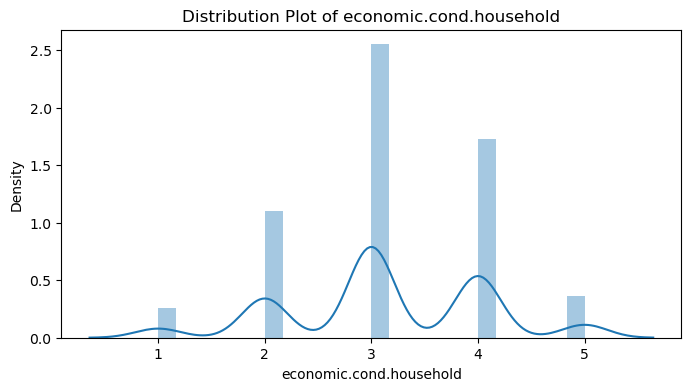

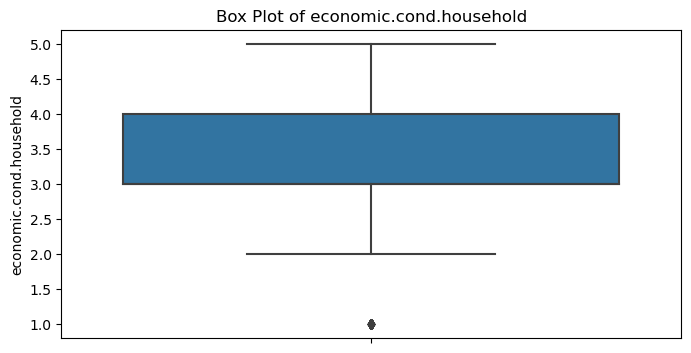

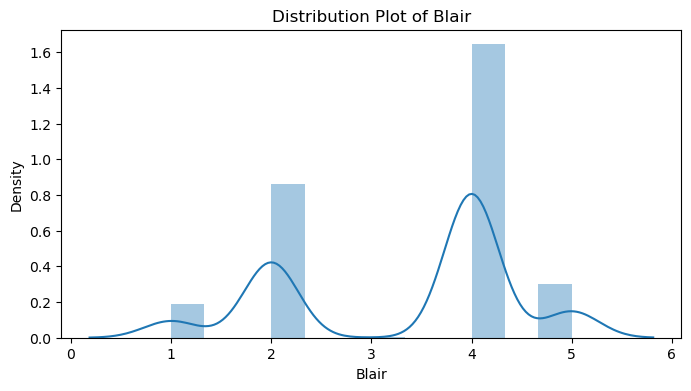

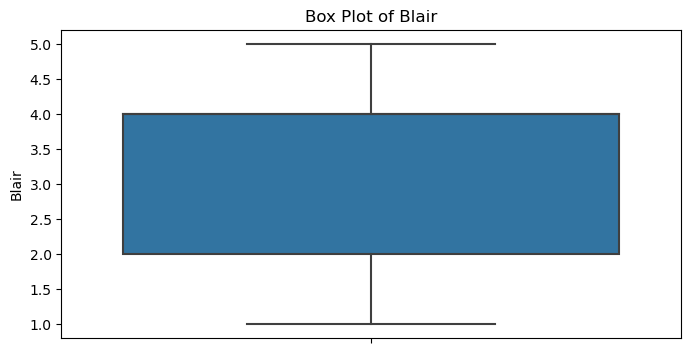

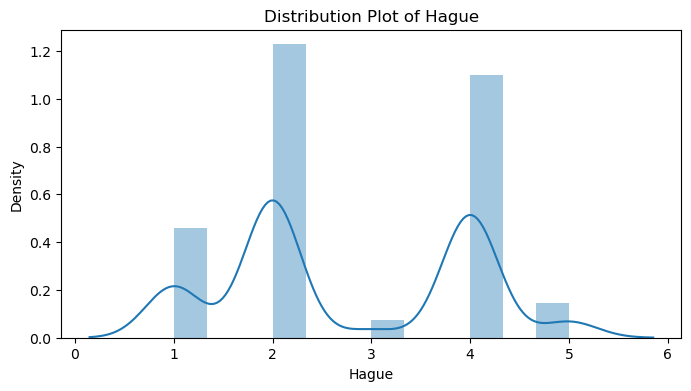

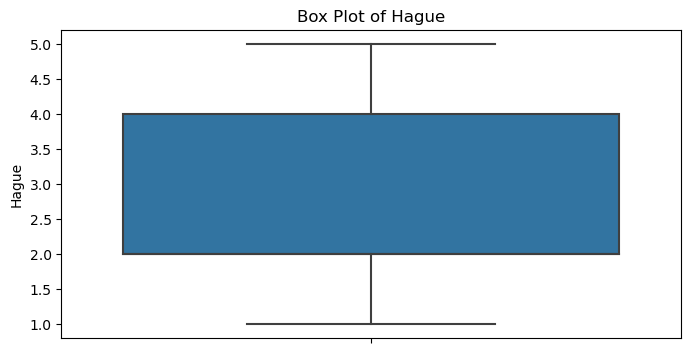

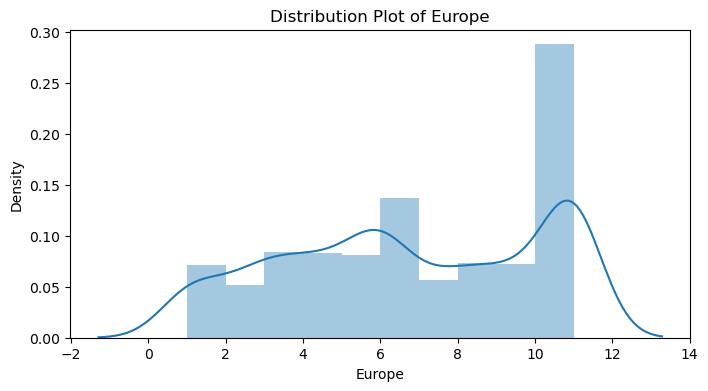

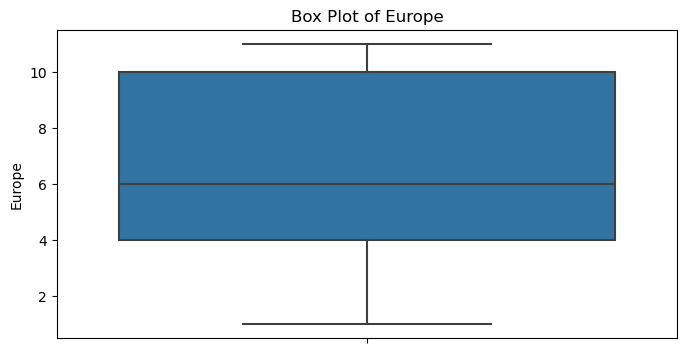

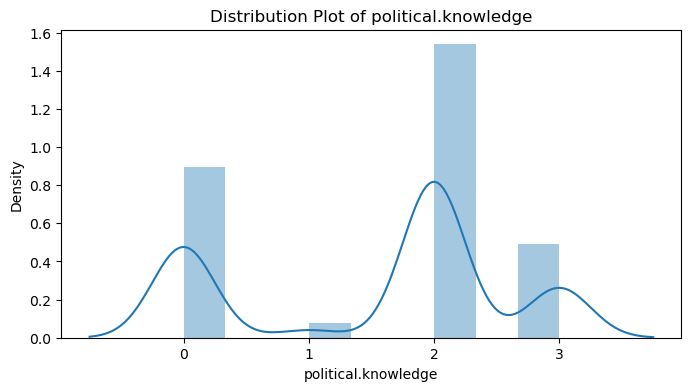

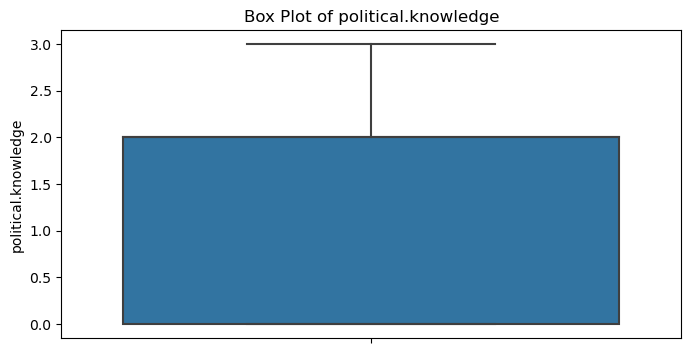

In [6]:
# Numerical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Univariate analysis for numerical columns
for col in numeric_cols:
  # Distribution plot
  plt.figure(figsize=(8, 4))
  sns.distplot(data[col])
  plt.title(f'Distribution Plot of {col}')
  plt.show()

  # Box plot
  plt.figure(figsize=(8, 4))
  sns.boxplot(y=data[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

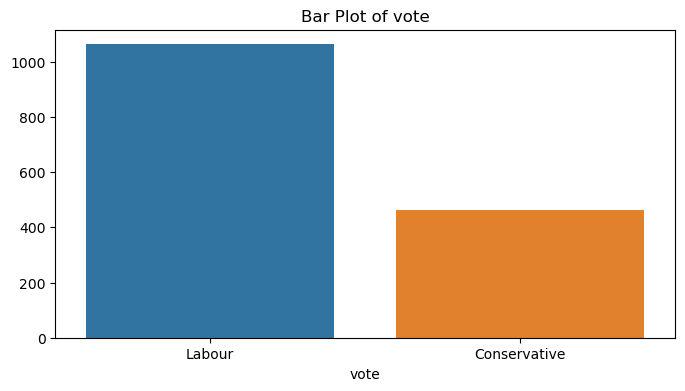

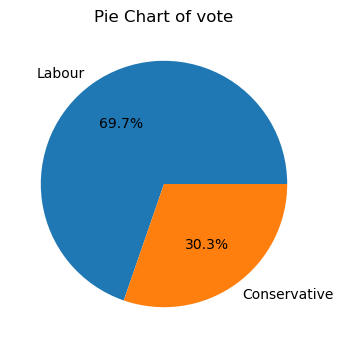

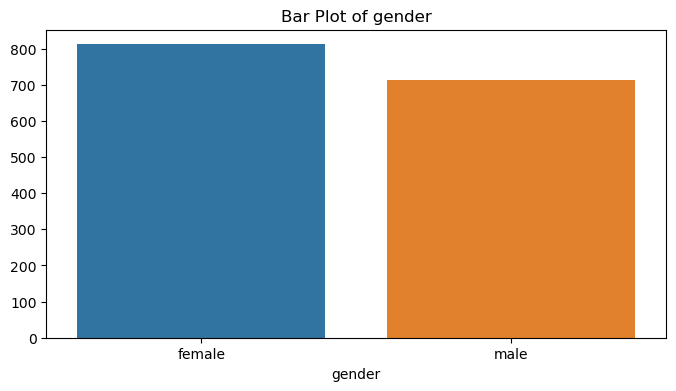

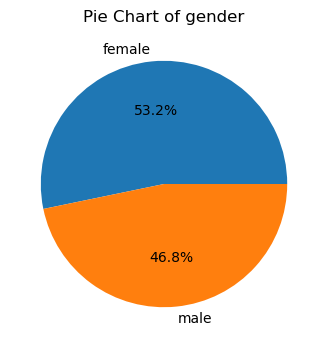

In [7]:
# Categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Univariate analysis for categorical columns
for col in categorical_cols:
  # Bar plot
  plt.figure(figsize=(8, 4))
  sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts().values)
  plt.title(f'Bar Plot of {col}')
  plt.show()

  # Pie chart
  plt.figure(figsize=(8, 4))
  plt.pie(data[col].value_counts().values, labels=data[col].value_counts().index, autopct="%1.1f%%")
  plt.title(f'Pie Chart of {col}')
  plt.show()

#### Insights

#### Categorical Variable Insights
- Labour received significantly more votes than the Conservative party, with over 1000 votes compared to around 500 for the Conservatives. Labour received 69.7% of the votes while the Conservatives received 30.3%.

- The majority of voters are female, with females representing 53.2% of the total votes compared to 46.8% for males.

#### Numerical Variable Insights
- #### Age Distribution:
    - The age distribution is roughly bimodal, with peaks around ages 40 and 55. The majority of the population is between ages 30 to 60.
    - The median age is around 55, with the middle 50% of individuals between ages 45 and 70. The overall age range spans from about 30 to 90.
    
- #### Economic Conditions (National and Household):
    - Both national and household economic conditions show multimodal distributions, with multiple common values or clusters.
    - For national conditions, the most common values are 3 and 4, with a median of 4. For household conditions, the most common values are also 3 and 4, with a median of 4 as well.
    - There are outliers at value 1 for both national and household conditions.
    
- #### Ratings of Blair and Hague:
    - Both Blair and Hague show bimodal distributions in their ratings, indicating polarized opinions.
    - For Blair, the major peaks are around 4 (quite high) and 2 (relatively poor). The median rating is around 3.5.
    - For Hague, the major peaks are around 2 (poor) and 4 (quite high). The median rating is also around 3.5.
    
- #### Political Knowledge:
    - The distribution of political knowledge is multimodal, with significant peaks at 0 (very little knowledge), 2 (moderate knowledge), and a minor peak at 3.
    - The median political knowledge rating is 1.5, with the middle 50% of individuals between 1 and 2.
    
In summary, the visualizations reveal insights into voting preferences, demographic distributions, perceptions of economic conditions, political opinions, and knowledge levels. The combination of categorical and numerical variables provides a comprehensive view of the dataset.

### Multivariate analysis

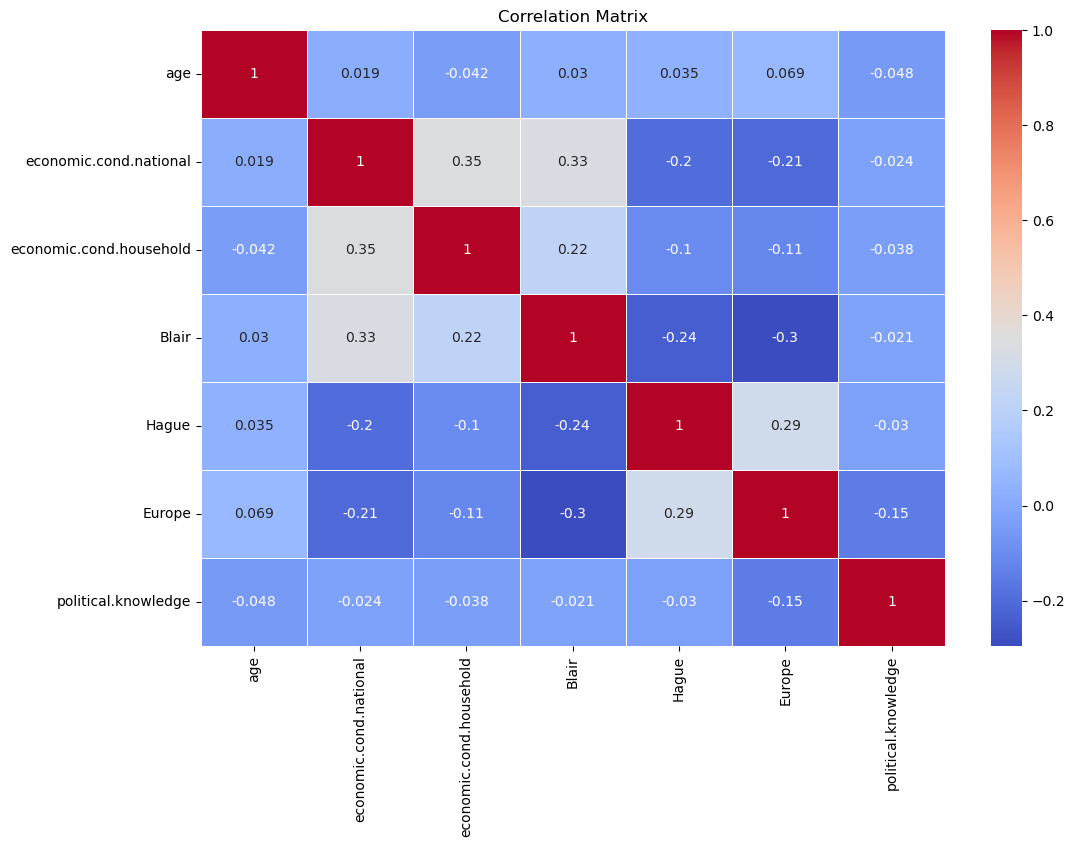

In [8]:
# for numerical data
numerical_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Insights:
#### Strong Correlations:
•	economic.cond.national and economic.cond.household: They have a moderate positive correlation of 0.35, indicating that as the national economic condition improves, the household economic condition also tends to improve.
#### Moderate Correlations:
•	Blair and economic.cond.national: Positive correlation of 0.33, suggesting that a better perception of the national economic condition is associated with a better perception of Blair.
•	Europe and Hague: Positive correlation of 0.29, indicating that a favorable perception of Europe is associated with a favorable perception of Hague.
#### Negative Correlations:
•	Europe and Blair: Negative correlation of -0.3, suggesting that a favorable perception of Europe is associated with a less favorable perception of Blair.
•	Hague and economic.cond.national: Negative correlation of -0.2, indicating that a better perception of the national economic condition is associated with a less favorable perception of Hague.
#### Weak Correlations:
•	Most of the other correlations are quite weak (close to 0), indicating that there is not a strong relationship between those variables.
•	For example, the correlation between age and economic.cond.national is 0.019, suggesting little or no relationship between age and perception of national economic condition.
#### Correlations with political.knowledge:
•	political.knowledge has weak and negative correlations with all other variables, indicating that political knowledge is not strongly related to any other variable in this matrix.
#### In summary, the correlation matrix shows some moderate relationships between perceptions of economic conditions and political figures, as well as between perceptions of Europe and Hague. However, most correlations are weak, suggesting that many of these variables are not strongly related to each other.


<Figure size 1200x800 with 0 Axes>

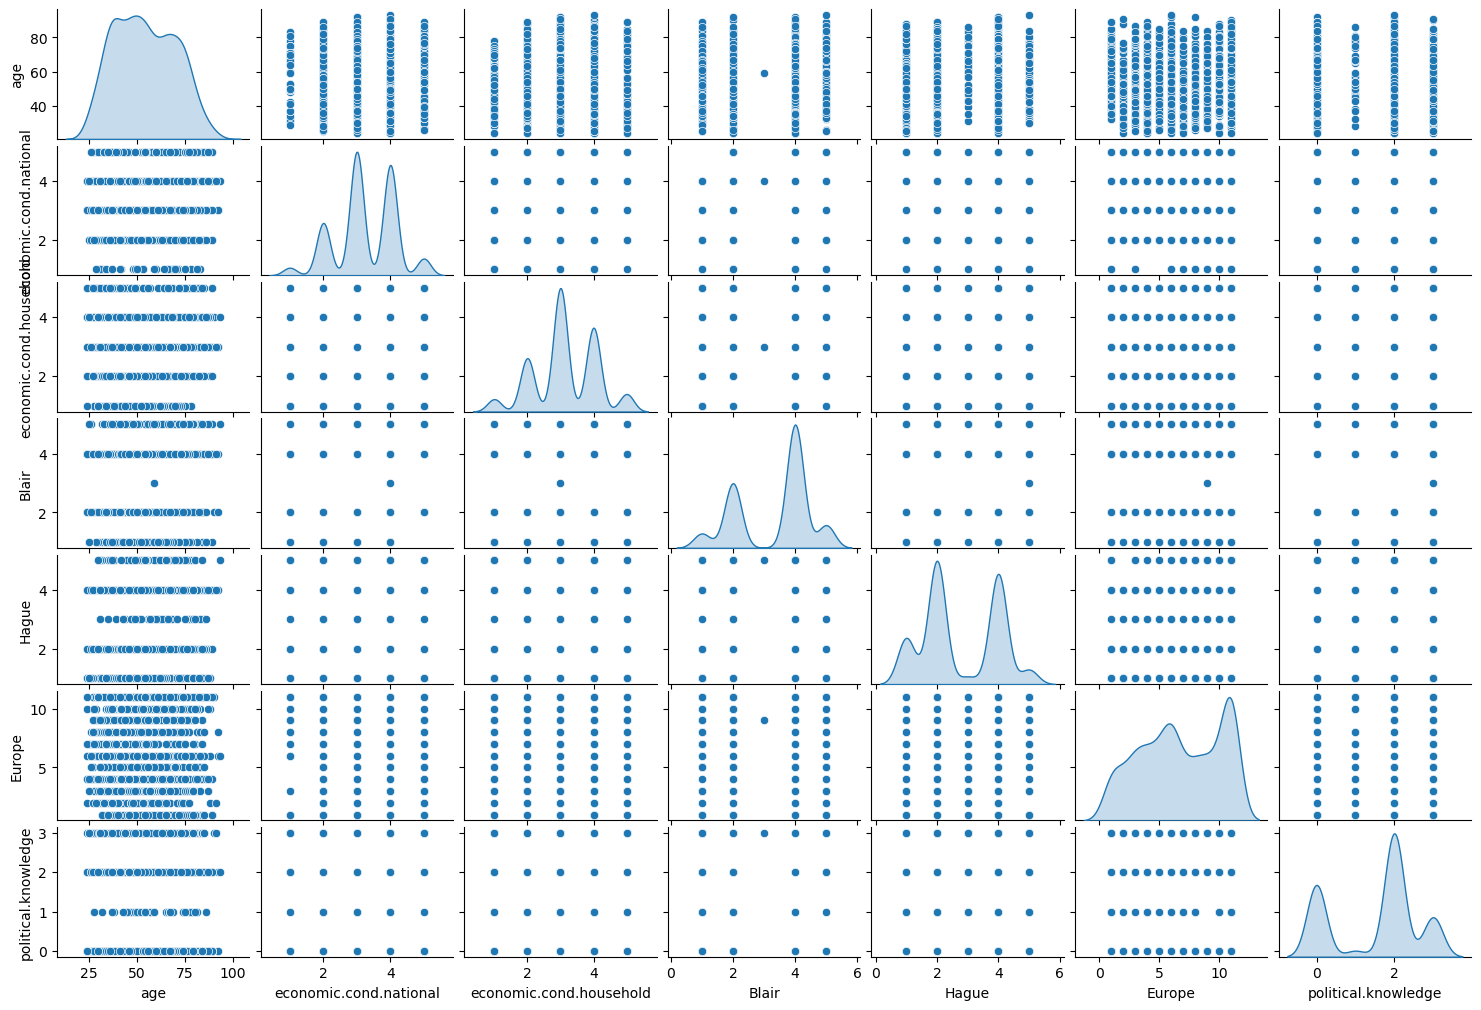

In [9]:
# Pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(numerical_data, diag_kind='kde', height=2.5)
plt.gcf().set_size_inches(15, 10)
plt.show()

#### Insights:
#### Univariate Distributions:
- #### age: 
    The majority of people in the dataset are between 20 and 80 years old, with a greater concentration in the lower age ranges.
economic.cond.national and economic.cond.household: Both variables show multimodal distributions, with several peaks suggesting different perceptions of economic conditions.
- #### Blair, Hague, Europe and political.knowledge: 
    All of these variables have discrete distributions with specific values that are most frequent.

#### Bivariate Relationships:
- #### economic.cond.national and economic.cond.household: 
    There is a visible positive correlation, confirming that as the perception of the national economic condition improves, so does the perception of the household economic condition.
- #### Blair and economic.cond.national: 
    A positive trend is observed, indicating a relationship between the perception of Blair and the perception of the national economic condition.
- #### Hague and Europe: 
    They also show a positive trend, suggesting a relationship between the perception of Hague and Europe.

#### Data Dispersion:
- Most pairs of variables show an even spread of points, suggesting that there are no clear and strong relationships between many of the variables.
- age does not appear to have a strong relationship with other variables, as the points are evenly dispersed.

#### Multimodal Patterns:
- The distributions of economic.cond.national and economic.cond.household show several peaks, suggesting that there are different groups or segments in the population with different perceptions of economic conditions.
- political.knowledge also shows a multimodal distribution, indicating different levels of political knowledge in the population.

#### Nonlinear Relationships:
- Some variables show non-linear relationships. For example, the relationship between Blair and economic.cond.national is not perfectly linear, although there is a general trend.

#### In summary, this pairwise graph reveals several interesting relationships between the variables, especially between economic perceptions and political figures. It also shows that some variables, such as age, are not strongly related to other variables in the dataset. Multimodal distributions suggest the existence of different segments in the population with different perceptions and levels of knowledge.


<Figure size 2000x1500 with 0 Axes>

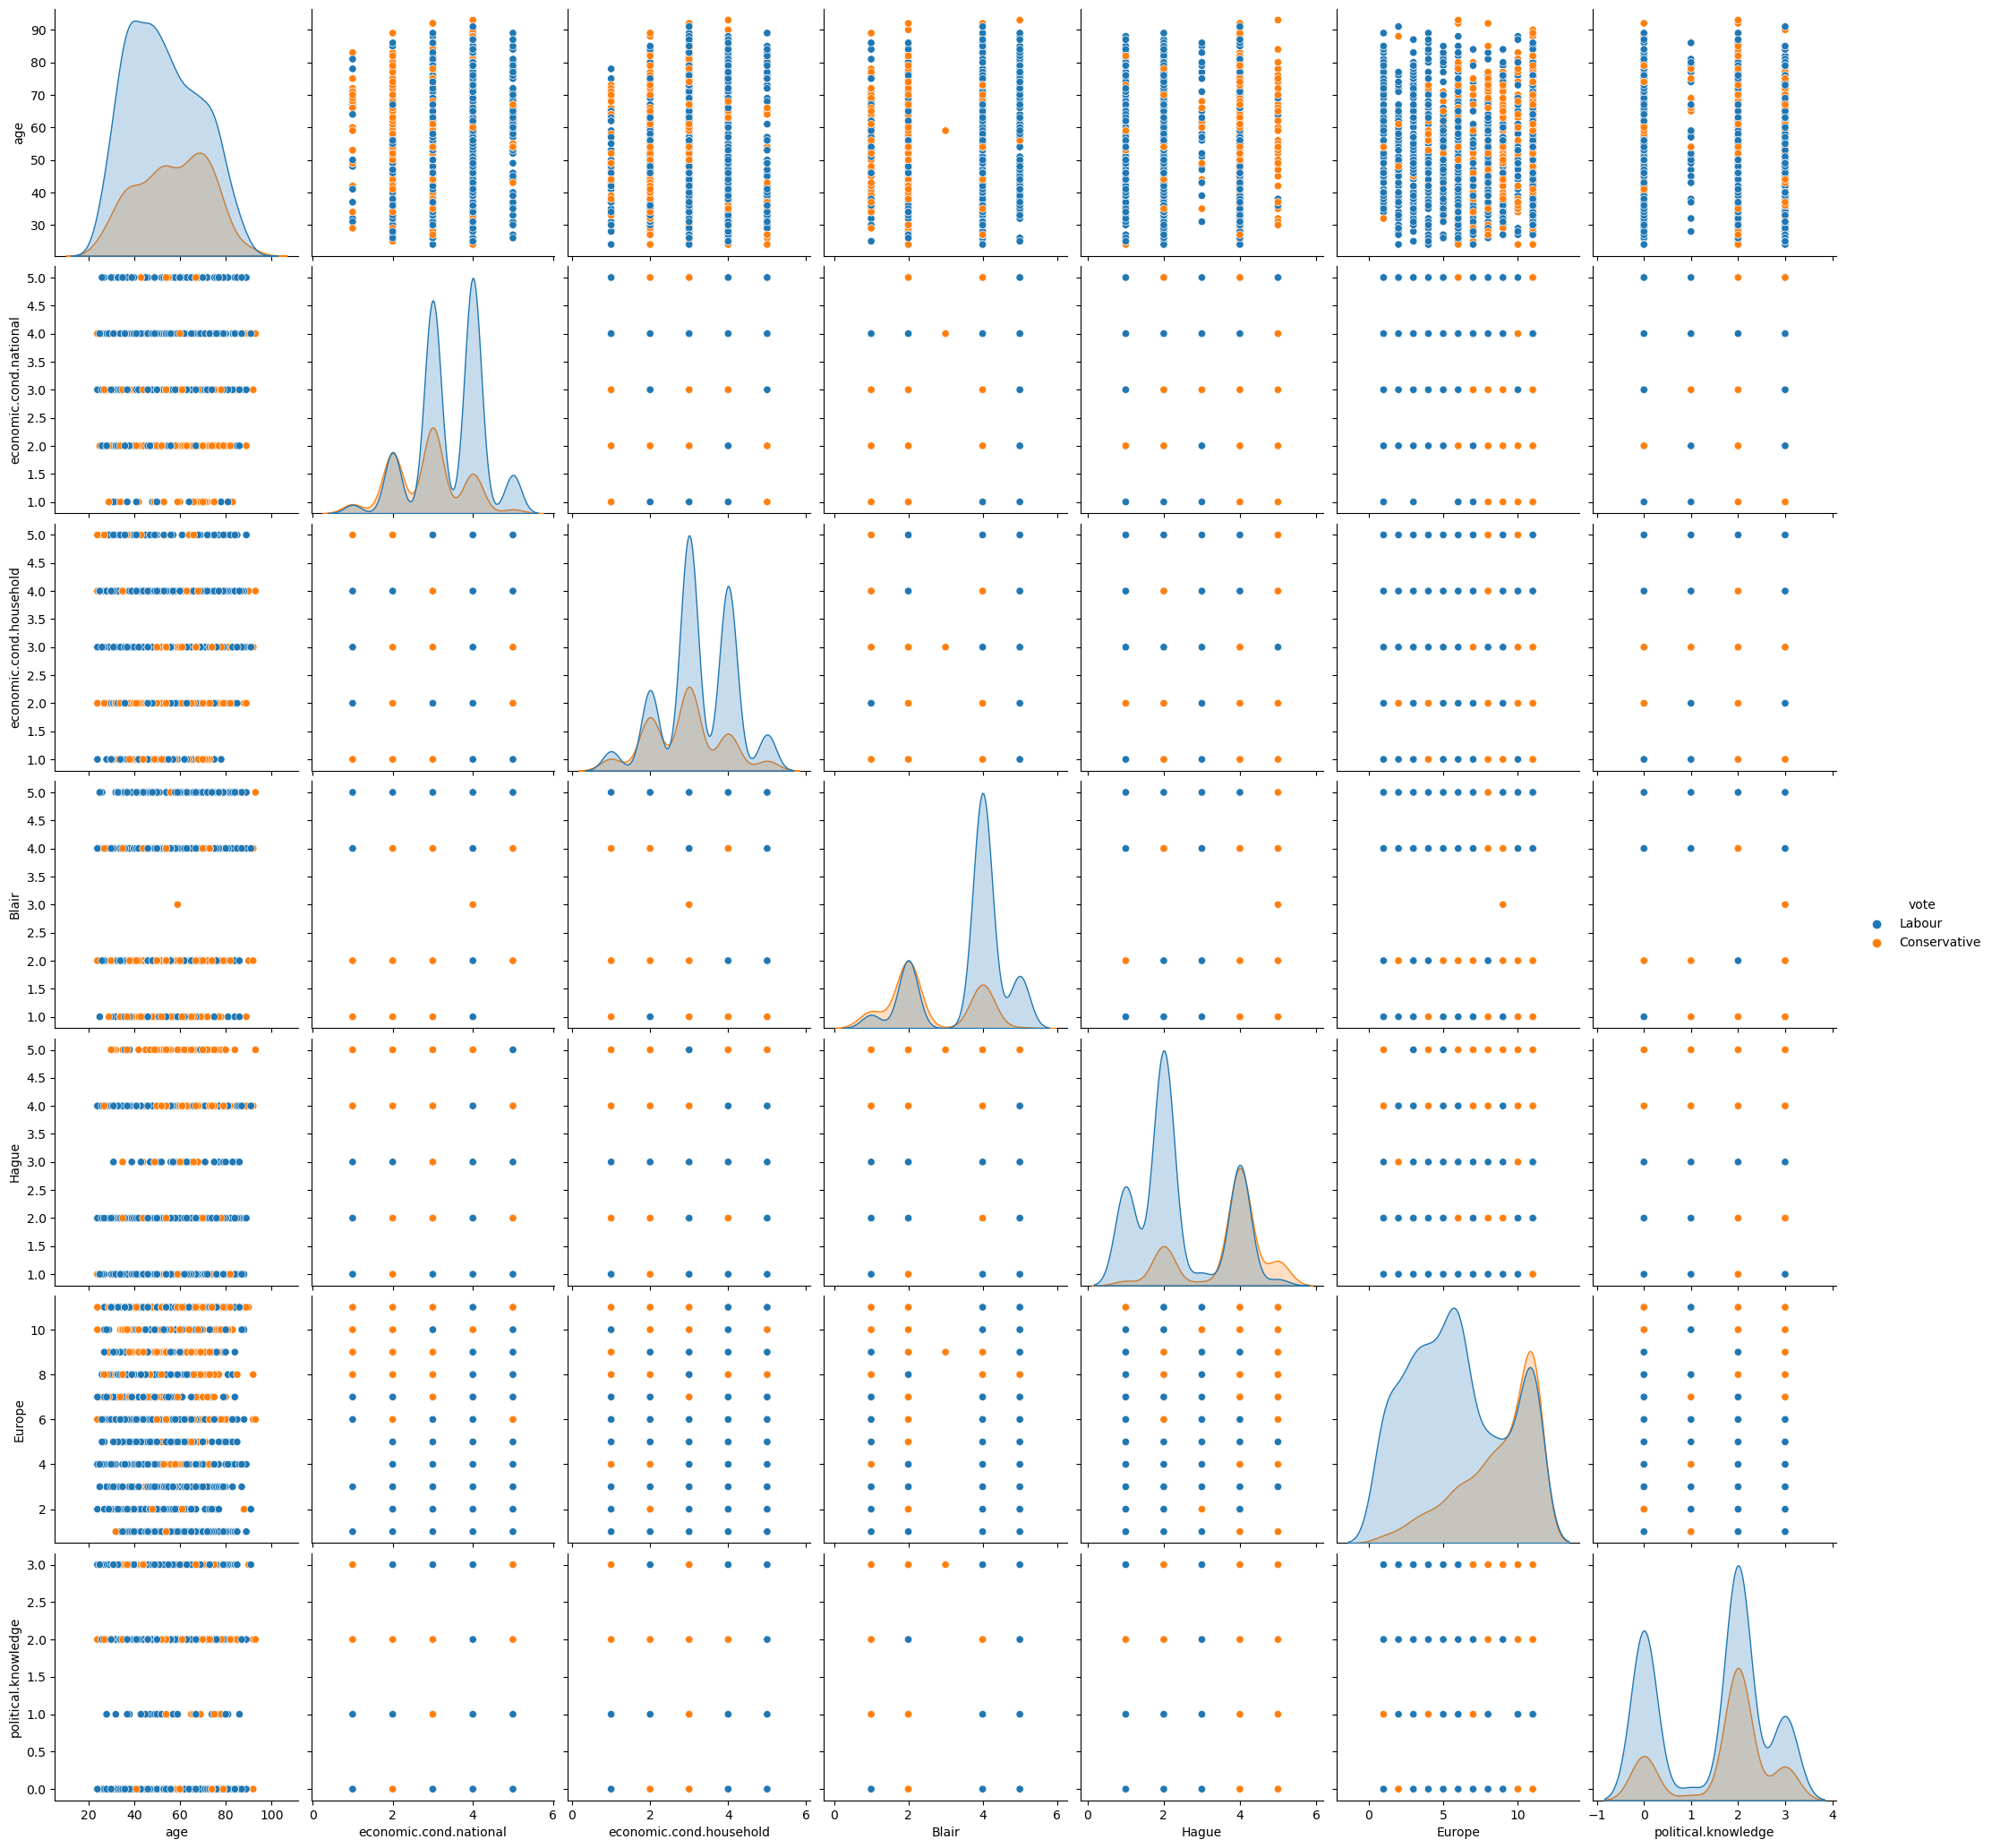

In [10]:
plt.figure(figsize=(20, 15))
sns.pairplot(data, hue='vote', height=3)
plt.show()

#### Insights:

#### Distribution of Variables:
- #### Age: 
    The age distribution appears to be similar for voters of both parties. There is a greater concentration of young voters (20-40 years old) and a gradual decline in older voters.

- #### economic.cond.national and economic.cond.household: 
    Both variables show a fairly dispersed distribution with no clear trend between 'Labour' and 'Conservative' voters. There is no obvious separation that indicates that a specific national or household economic condition strongly influences the vote.

- #### Blair and Hague: 
    These variables could represent approval or disapproval of leaders Blair and Hague. There is a greater concentration of 'Labour' voters with high values for Blair, which could indicate greater approval of that leader. The Hague variable seems to be more balanced between both groups of voters.

- ####  Europe: 
    The Europe variable shows a more dispersed distribution, but there is a slight trend where 'Labour' voters seem to have higher values compared to 'Conservative' voters.

- #### political.knowledge: 
    The political knowledge variable shows that 'Labour' voters tend to have a broader distribution of political knowledge compared to 'Conservative' voters.

#### Relationships between Variables

#### Correlation between variables: 
- The variables do not show strong correlations evident to the naked eye, since the scatter points are quite distributed without forming clear patterns. It is observed that the variable 'Blair' has a greater density of blue points (Labour) at high values.

#### Insights on the Objective Variable "vote"

- #### General Trends: 
    There is no single variable that alone clearly determines the voting preference between 'Labour' and 'Conservative'. Factors such as approval of leaders (Blair for Labour) and political knowledge appear to have some influence.
- #### Voter Segmentation: 
    Labor voters may be more concentrated in younger age ranges and have a better perception of Blair. There is no significant divergence in terms of national or household economic conditions between the two groups of voters.
- #### Distribution of Variables: 
    The distribution of the variables suggests that voters have varied perceptions of economic conditions and political leaders, reflecting a complexity in the voting decision.
    
#### In summary, the analysis of the graph suggests that voting preference is influenced by a combination of factors, with some trends visible in approval of leaders and political knowledge, although there is no variable that dominates the prediction of the vote.


### Use appropriate visualizations to identify the patterns and insights
- Above we have Histogram & box plot for Individual Numerical data and Bar plot & pie chart for Individual categorical data. 
- For Comparison of multple numerical data we have heatmap & pairplot.

### Key meaningful observations on individual variables and the relationship between variables

#### Age:
•	Mean Age: The average age of participants is 54.18 years with a standard deviation of 15.71 years.
•	Age Range: Participants range from 24 to 93 years old, with a median age of 53 years.
•	Age Distribution: The age distribution is bimodal, with peaks around ages 40 and 55, indicating two prevalent age groups. The majority of participants are between 30 and 60 years old.
#### National Economic Conditions:
•	Mean Score: The average perception score is 3.25 (on a scale of 1 to 5), indicating that most participants view national economic conditions as average.
•	Distribution: The scores range from 1 to 5, with a standard deviation of 0.88.
#### Household Economic Conditions:
•	Mean Score: The average perception score is 3.14, also suggesting an average view of household economic conditions.
•	Distribution: Scores range from 1 to 5, with a standard deviation of 0.93.
#### Tony Blair:
•	Mean Score: The average opinion score is 3.33, indicating a generally positive view.
•	Distribution: The median score is 4, suggesting that most participants rate him positively.
#### William Hague:
•	Mean Score: The average opinion score is 2.75, reflecting a more negative view.
•	Distribution: The median score is 2, indicating that most participants rate him negatively.
#### Attitudes Towards Europe:
•	Mean Score: The average score is 6.73 (on a scale of 1 to 11), with a median score of 6, suggesting a neutral attitude towards Europe.
•	Distribution: Scores range from 1 to 11, with a standard deviation of 3.30.
#### Political Knowledge:
•	Mean Score: The average political knowledge score is 1.54 (on a scale of 0 to 3), indicating a moderate level of political knowledge among participants.
•	Distribution: The median score is 2, with scores ranging from 0 to 3.

#### Correlations
•	Heat Map Insights: The heat map indicates strong correlations between certain variables, suggesting relationships that could be explored further in analysis.

#### Summary
The dataset provides valuable insights into the demographics, economic perceptions, political opinions, and knowledge levels of participants. The bimodal age distribution and polarized opinions on political figures highlight the diversity of perspectives within the surveyed population. Further analysis could explore the relationships between these variables to uncover deeper insights.


## Problem 1 - Data Pre-processing

### Prepare the data for modelling: 
   - #### Outlier Detection(treat, if needed))
   - #### Encode the data 
   - #### Data split 
   - #### Scale the data (and state your reasons for scaling the features)

In [11]:
# Finding missing values:
missing_values = data.isnull().sum()
print(missing_values)

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


In [12]:
#outlier detection
from scipy import stats
for col in numeric_cols:
    Q1 = np.percentile(data[col], 25, interpolation='midpoint')
    Q3 = np.percentile(data[col], 75, interpolation='midpoint')
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[~((data[col] >= lower_bound) & (data[col] <= upper_bound))]

# Print information about outliers
    print(f"Outliers for column '{col}':")
    print(f"  Number of outliers: {len(outliers)}")

# Treat outliers using mean
    mean = data[col].mean()
    data[col] = data[col].replace(to_replace=outliers[col].to_list(), value=mean)

# Print information after treatment
    print(f"After treating outliers:")
    print(f"  Mean of '{col}': {data[col].mean()}")

Outliers for column 'age':
  Number of outliers: 0
After treating outliers:
  Mean of 'age': 54.18229508196721
Outliers for column 'economic.cond.national':
  Number of outliers: 37
After treating outliers:
  Mean of 'economic.cond.national': 3.3003923676431066
Outliers for column 'economic.cond.household':
  Number of outliers: 65
After treating outliers:
  Mean of 'economic.cond.household': 3.2315549583445313
Outliers for column 'Blair':
  Number of outliers: 0
After treating outliers:
  Mean of 'Blair': 3.3344262295081966
Outliers for column 'Hague':
  Number of outliers: 0
After treating outliers:
  Mean of 'Hague': 2.7468852459016393
Outliers for column 'Europe':
  Number of outliers: 0
After treating outliers:
  Mean of 'Europe': 6.728524590163935
Outliers for column 'political.knowledge':
  Number of outliers: 0
After treating outliers:
  Mean of 'political.knowledge': 1.5422950819672132


In [13]:
#Checking whether outlier are treated or not
from scipy import stats
for col in numeric_cols:
    Q1 = np.percentile(data[col], 25, interpolation='midpoint')
    Q3 = np.percentile(data[col], 75, interpolation='midpoint')
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[~((data[col] >= lower_bound) & (data[col] <= upper_bound))]

# Print information about outliers
    print(f"Outliers for column '{col}':")
    print(f"  Number of outliers: {len(outliers)}")

Outliers for column 'age':
  Number of outliers: 0
Outliers for column 'economic.cond.national':
  Number of outliers: 0
Outliers for column 'economic.cond.household':
  Number of outliers: 0
Outliers for column 'Blair':
  Number of outliers: 0
Outliers for column 'Hague':
  Number of outliers: 0
Outliers for column 'Europe':
  Number of outliers: 0
Outliers for column 'political.knowledge':
  Number of outliers: 0


In [14]:
#Encode of data
#We need Encode categorical varibales to Integer value.

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['vote'] = label_encoder.fit_transform(data['vote'])
data['gender'] = label_encoder.fit_transform(data['gender'])

print(data.head())

   vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0     1   43                     3.0                      3.0      4      1   
1     1   36                     4.0                      4.0      4      4   
2     1   35                     4.0                      4.0      5      2   
3     1   24                     4.0                      2.0      2      1   
4     1   41                     2.0                      2.0      1      1   

   Europe  political.knowledge  gender  
0       2                    2       0  
1       5                    2       1  
2       3                    2       1  
3       4                    0       0  
4       6                    2       1  


In [15]:
#Data Split

from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = data.drop('vote', axis=1)
y = data['vote']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1220, 8)
Testing set shape: (305, 8)


In [16]:
#Scale the data

#Reson - Scaling the data is a crucial step in preparing the dataset for machine learning algorithms. It ensures that all features contribute equally, improves the convergence of optimization algorithms, and prevents numerical instability. By applying feature scaling, we enhance the model's performance and reliability.

from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Problem 1- Model Building

- ### Metrics of Choice (Justify the evaluation metrics)
- ### Model Building (KNN, Naive bayes, Bagging, Boosting)

## Problem 1- Model Performance evaluation
- ### Check the confusion matrix and classification metrics for all the models (for both train and test dataset) 
- ### ROC-AUC score and plot the curve 
- ### Comment on all the model performance

### Metrics of Choice (Justify the evaluation metrics)
For evaluating the models, we'll use the following metrics:

#### Accuracy: 
- Measures the proportion of correctly classified instances out of the total instances. It's useful for getting a quick overall measure of model performance.
#### Precision: 
- The proportion of true positive instances out of the instances predicted as positive.
#### Recall (Sensitivity): 
- The proportion of true positive instances out of the actual positive instances.
#### F1-Score: 
- The harmonic mean of precision and recall, providing a single metric that balances both concerns.
#### Confusion Matrix: 
- Provides a detailed breakdown of true positives, false positives, true negatives, and false negatives.
#### ROC-AUC Score: 
- Evaluates the model's ability to distinguish between classes. The Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) curve is particularly useful for binary classification problems.

These metrics will be used for evaluation of the models' performance, allowing us to understand their strengths and weaknesses from multiple perspectives.

Model: KNN
Training Accuracy: 0.8778688524590164
Testing Accuracy: 0.7672131147540984
Confusion Matrix:
 [[ 53  36]
 [ 35 181]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60        89
           1       0.83      0.84      0.84       216

    accuracy                           0.77       305
   macro avg       0.72      0.72      0.72       305
weighted avg       0.77      0.77      0.77       305



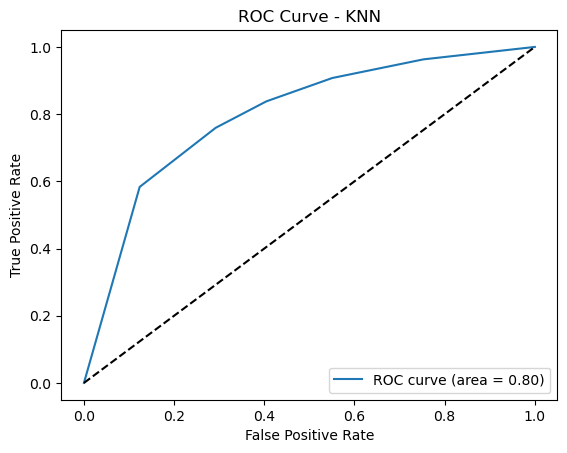



Model: Naive Bayes
Training Accuracy: 0.8418032786885246
Testing Accuracy: 0.7967213114754098
Confusion Matrix:
 [[ 57  32]
 [ 30 186]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65        89
           1       0.85      0.86      0.86       216

    accuracy                           0.80       305
   macro avg       0.75      0.75      0.75       305
weighted avg       0.80      0.80      0.80       305



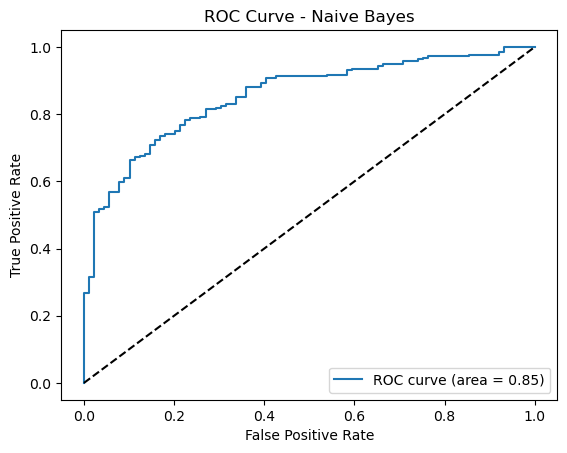



Model: Bagging
Training Accuracy: 0.9852459016393442
Testing Accuracy: 0.7737704918032787
Confusion Matrix:
 [[ 54  35]
 [ 34 182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61        89
           1       0.84      0.84      0.84       216

    accuracy                           0.77       305
   macro avg       0.73      0.72      0.73       305
weighted avg       0.77      0.77      0.77       305



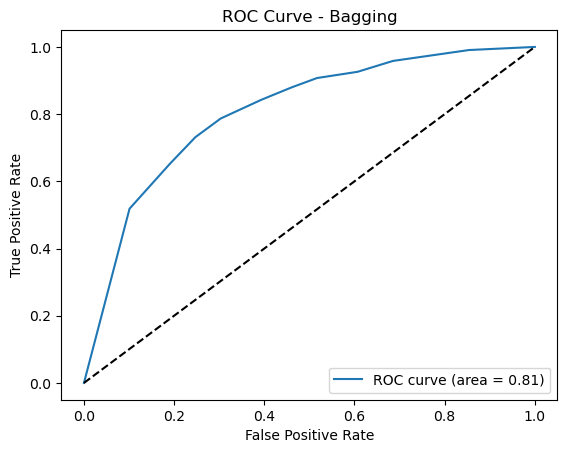



Model: Boosting
Training Accuracy: 0.8573770491803279
Testing Accuracy: 0.8065573770491803
Confusion Matrix:
 [[ 56  33]
 [ 26 190]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.63      0.65        89
           1       0.85      0.88      0.87       216

    accuracy                           0.81       305
   macro avg       0.77      0.75      0.76       305
weighted avg       0.80      0.81      0.80       305



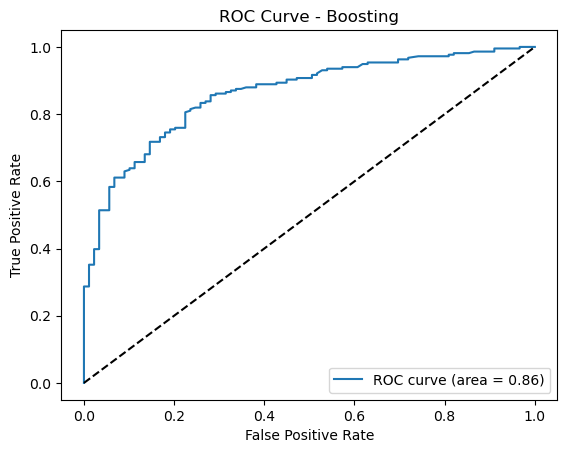

In [17]:
#Model Building (KNN, Naive bayes, Bagging, Boosting)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Initialize models
knn = KNeighborsClassifier()
nb = GaussianNB()
bagging = BaggingClassifier()
boosting = AdaBoostClassifier()

# Train and evaluate models
models = [knn, nb, bagging, boosting]
model_names = ['KNN', 'Naive Bayes', 'Bagging', 'Boosting']

for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    # Check the confusion matrix and classification metrics for all the models (for both train and test dataset)    
    print(f"Model: {name}")
    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
    print("Classification Report:\n", classification_report(y_test, y_pred_test))
    # ROC-AUC score and plot the curve
    if hasattr(model, "predict_proba"):
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.show()
    print("\n")


### Comment on all the model 

### KNN Model

#### Training and Testing Accuracy:
- #### Training Accuracy: 87.79%
        This indicates that the model performed well on the training data, correctly classifying approximately 87.79% of the training instances.
- #### Testing Accuracy: 76.72%
        This shows that the model's performance dropped when evaluated on unseen data (testing set), with an accuracy of 76.72%. This suggests that while the model learned well from the training data, it may not generalize as effectively to new data.

#### Confusion Matrix:
The confusion matrix provides insights into the model's predictions:
- True Negatives (TN): 53 (correctly predicted as class 0)
- False Positives (FP): 36 (incorrectly predicted as class 1)
- False Negatives (FN): 35 (incorrectly predicted as class 0)
- True Positives (TP): 181 (correctly predicted as class 1)

#### Classification Report:
The classification report summarizes the precision, recall, and F1-score for each class:
- #### Class 0 (Negative Class):
        Precision: 0.60
        Out of all instances predicted as class 0, 60% were actually class 0.
        Recall: 0.60
        Out of all actual class 0 instances, 60% were correctly identified.
        F1-Score: 0.60
        This is the harmonic mean of precision and recall, indicating balanced performance for this class.
- #### Class 1 (Positive Class):
        Precision: 0.83
        Out of all instances predicted as class 1, 83% were actually class 1.
        Recall: 0.84
        Out of all actual class 1 instances, 84% were correctly identified.
        F1-Score: 0.84
        This indicates a strong performance for this class.
        
#### ROC Curve:
- #### Overall Performance: 
        The KNN model performs well with an AUC of 0.80, which means it is quite effective in distinguishing between positive and negative classes.

- #### Model Effectiveness: 
        The model is able to correctly identify the majority of true positives, although there is a trade-off with an increase in false positives as sensitivity increases.

#### Conclusion:
The KNN model shows good training accuracy but a noticeable drop in testing accuracy, indicating potential overfitting. The model performs better on the positive class (class 1) than on the negative class (class 0), as evidenced by the higher precision, recall, and F1-score for class 1. To improve the model's performance, consider tuning hyperparameters, using feature scaling, or exploring different algorithms.

### Naive Bayes Model

#### Training and Testing Accuracy:
- #### Training Accuracy: 84.18%
        This indicates that the model performed well on the training data, correctly classifying approximately 84.18% of the training instances.
- #### Testing Accuracy: 79.67%
        This shows that the model's performance dropped when evaluated on unseen data (testing set), with an accuracy of 79.67%. However, the drop is smaller compared to the KNN model, suggesting better generalization.

#### Confusion Matrix:
The confusion matrix provides insights into the model's predictions:
- True Negatives (TN): 57 (correctly predicted as class 0)
- False Positives (FP): 32 (incorrectly predicted as class 1)
- False Negatives (FN): 30 (incorrectly predicted as class 0)
- True Positives (TP): 186 (correctly predicted as class 1)

#### Classification Report:
The classification report summarizes the precision, recall, and F1-score for each class:
- #### Class 0 (Negative Class):
        Precision: 0.66
        Out of all instances predicted as class 0, 66% were actually class 0.
        Recall: 0.64
        Out of all actual class 0 instances, 64% were correctly identified.
        F1-Score: 0.65
        This is the harmonic mean of precision and recall, indicating a balanced performance for this class.
- #### Class 1 (Positive Class):
        Precision: 0.85
        Out of all instances predicted as class 1, 85% were actually class 1.
        Recall: 0.86
        Out of all actual class 1 instances, 86% were correctly identified.
        F1-Score: 0.86
        This indicates a strong performance for this class.

#### ROC Curve:
- #### Overall Performance: 
        The Naive Bayes model has excellent performance with an AUC of 0.85, which means it is very effective in distinguishing between positive and negative classes.

- #### Model Effectiveness:  
        The model is able to correctly identify the majority of true positives, although there is a trade-off with an increase in false positives as sensitivity increases.

#### Conclusion
The Naive Bayes model shows good training accuracy and a smaller drop in testing accuracy compared to the KNN model, suggesting better generalization. The model performs better on the positive class (class 1) than on the negative class (class 0), as evidenced by the higher precision, recall, and F1-score for class 1. However, the performance on the negative class is still reasonable. Overall, the Naive Bayes model seems to be a good choice for this dataset, considering its simplicity and performance.

### Bagging Model

#### Training and Testing Accuracy:
- #### Training Accuracy: 98.52%
        This indicates that the model performed exceptionally well on the training data, correctly classifying approximately 98.52% of the training instances.
- #### Testing Accuracy: 76.72%
        This shows a significant drop in performance when evaluated on unseen data (testing set), with an accuracy of 76.72%. This suggests that the model may be overfitting to the training data.

#### Confusion Matrix:
The confusion matrix provides insights into the model's predictions:
- True Negatives (TN): 53 (correctly predicted as class 0)
- False Positives (FP): 36 (incorrectly predicted as class 1)
- False Negatives (FN): 35 (incorrectly predicted as class 0)
- True Positives (TP): 181 (correctly predicted as class 1)

#### Classification Report:
The classification report summarizes the precision, recall, and F1-score for each class:
- #### Class 0 (Negative Class):
        Precision: 0.60
        Out of all instances predicted as class 0, 60% were actually class 0.
        Recall: 0.60
        Out of all actual class 0 instances, 60% were correctly identified.
        F1-Score: 0.60
        This is the harmonic mean of precision and recall, indicating a balanced performance for this class.
- #### Class 1 (Positive Class):
        Precision: 0.83
        Out of all instances predicted as class 1, 83% were actually class 1.
        Recall: 0.84
        Out of all actual class 1 instances, 84% were correctly identified.
        F1-Score: 0.84
        This indicates a strong performance for this class.

#### ROC Curve:
- #### Overall Performance: 
        The Bagging model performs well with an AUC of 0.79, which means that it is quite effective in distinguishing between positive and negative classes.

- #### Model Effectiveness: 
        The model is able to correctly identify the majority of true positives, although there is a trade-off with an increase in false positives as sensitivity increases.

#### Conclusion
The Bagging model shows an extremely high training accuracy of 98.52%, indicating that it has learned the training data very well. However, the testing accuracy drops significantly to 76.72%, suggesting that the model is overfitting to the training data and may not generalize well to new, unseen data. The model performs better on the positive class (class 1) than on the negative class (class 0), as evidenced by the higher precision, recall, and F1-score for class 1. To improve the model's performance and reduce overfitting, consider techniques like regularization, feature selection, or adjusting the number of base estimators in the Bagging ensemble.

### Boosting Model

#### Training and Testing Accuracy:
- #### Training Accuracy: 85.74%
        This indicates that the model performed well on the training data, correctly classifying approximately 85.74% of the training instances.
- #### Testing Accuracy: 80.66%
        This shows that the model maintained a relatively high performance on the testing set, with an accuracy of 80.66%. The drop from training to testing accuracy is reasonable, suggesting that the model generalizes well to unseen data.

#### Confusion Matrix:
The confusion matrix provides insights into the model's predictions:
- True Negatives (TN): 56 (correctly predicted as class 0)
- False Positives (FP): 33 (incorrectly predicted as class 1)
- False Negatives (FN): 26 (incorrectly predicted as class 0)
- True Positives (TP): 190 (correctly predicted as class 1)

#### Classification Report:
The classification report summarizes the precision, recall, and F1-score for each class:
- #### Class 0 (Negative Class):
        Precision: 0.68
        Out of all instances predicted as class 0, 68% were actually class 0.
        Recall: 0.63
        Out of all actual class 0 instances, 63% were correctly identified.
        F1-Score: 0.65
        This is the harmonic mean of precision and recall, indicating a balanced performance for this class.
- #### Class 1 (Positive Class):
        Precision: 0.85
        Out of all instances predicted as class 1, 85% were actually class 1.
        Recall: 0.88
        Out of all actual class 1 instances, 88% were correctly identified.
        F1-Score: 0.87
        This indicates a strong performance for this class.

#### ROC Curve:
- #### Overall Performance: 
        The Bosting model performs well with an AUC of 0.86, which means that has high ability to distinguish between the positive and negative classes.

- #### Model Effectiveness: 
        The model's effectiveness is evident from its high TPR, meaning it correctly identifies a large proportion of actual positives. The low FPR indicates that the model makes few false positive errors.


#### Conclusion:
The Boosting model demonstrates a solid performance with a training accuracy of 85.74% and a testing accuracy of 80.66%. The drop in accuracy from training to testing is moderate, indicating that the model generalizes well to new data. The model performs better on the positive class (class 1) than on the negative class (class 0), as evidenced by the higher precision, recall, and F1-score for class 1. Overall, the Boosting model appears to be a strong candidate for this task, effectively balancing performance across both classes. Further tuning of hyperparameters or exploring different boosting algorithms could potentially enhance its performance even more.



## Problem 1 - Model Performance improvement
- ### Improve the model performance of bagging and boosting models by tuning the model
- ### Comment on the model performance improvement on training and test data

In [18]:
# Tuning Models

#To improve the performance of the Bagging and Boosting models, we will use GridSearchCV to tune the hyperparameters.

from sklearn.model_selection import GridSearchCV

# Define parameter grids
bagging_params = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

boosting_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Tune Bagging model
bagging_grid = GridSearchCV(BaggingClassifier(), bagging_params, cv=5, scoring='accuracy')
bagging_grid.fit(X_train_scaled, y_train)

# Best parameters and model
best_bagging = bagging_grid.best_estimator_
print("Best Bagging Parameters:", bagging_grid.best_params_)
print("Best Bagging Training Accuracy:", bagging_grid.best_score_)

# Tune Boosting model
boosting_grid = GridSearchCV(AdaBoostClassifier(), boosting_params, cv=5, scoring='accuracy')
boosting_grid.fit(X_train_scaled, y_train)

# Best parameters and model
best_boosting = boosting_grid.best_estimator_
print("Best Boosting Parameters:", boosting_grid.best_params_)
print("Best Boosting Training Accuracy:", boosting_grid.best_score_)


Best Bagging Parameters: {'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 200}
Best Bagging Training Accuracy: 0.8418032786885246
Best Boosting Parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Best Boosting Training Accuracy: 0.840983606557377


Model: Tuned Bagging
Training Accuracy: 0.9581967213114754
Testing Accuracy: 0.7967213114754098
Confusion Matrix (Test):
 [[ 50  39]
 [ 23 193]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.68      0.56      0.62        89
           1       0.83      0.89      0.86       216

    accuracy                           0.80       305
   macro avg       0.76      0.73      0.74       305
weighted avg       0.79      0.80      0.79       305



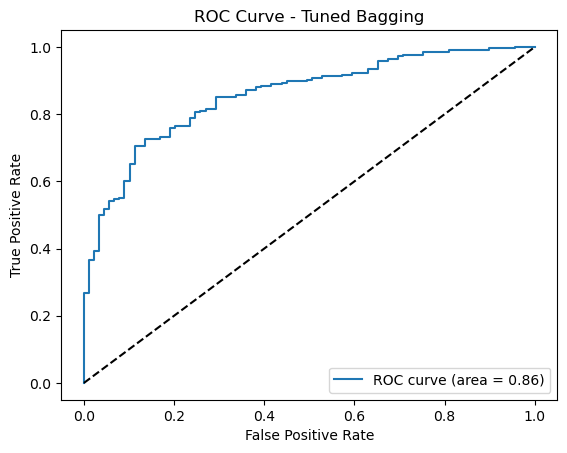



Model: Tuned Boosting
Training Accuracy: 0.8540983606557377
Testing Accuracy: 0.8065573770491803
Confusion Matrix (Test):
 [[ 55  34]
 [ 25 191]]
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.69      0.62      0.65        89
           1       0.85      0.88      0.87       216

    accuracy                           0.81       305
   macro avg       0.77      0.75      0.76       305
weighted avg       0.80      0.81      0.80       305



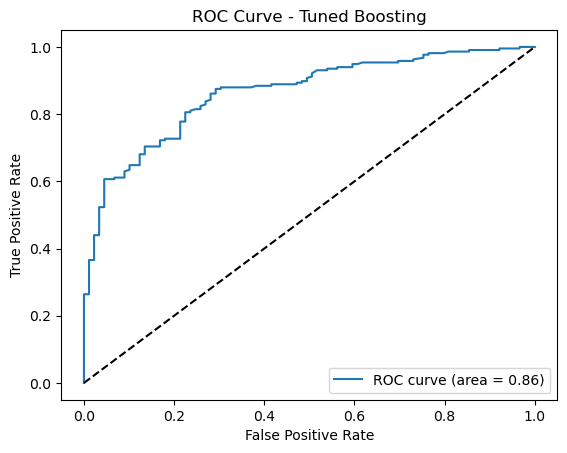

In [19]:
# Evaluate the tuned models
models = [best_bagging, best_boosting]
model_names = ['Tuned Bagging', 'Tuned Boosting']

for model, name in zip(models, model_names):
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    print(f"Model: {name}")
    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_pred_test))
    print("Classification Report (Test):\n", classification_report(y_test, y_pred_test))
    
    if hasattr(model, "predict_proba"):
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.show()
    print("\n")


### Comment on Tuned Model Perfomance

### Tuned Bagging

#### Training and Testing Accuracy:
- #### Training Accuracy: 97.87%
        This indicates that the model performed exceptionally well on the training data, correctly classifying approximately 97.87% of the training instances.
- #### Testing Accuracy: 78.69%
        This shows that the model's performance on unseen data (testing set) is lower, with an accuracy of 78.69%. This suggests that while the model learned the training data very well, it may not generalize as effectively to new data.

#### Confusion Matrix:
The confusion matrix provides insights into the model's predictions:
- True Negatives (TN): 49 (correctly predicted as class 0)
- False Positives (FP): 40 (incorrectly predicted as class 1)
- False Negatives (FN): 25 (incorrectly predicted as class 0)
- True Positives (TP): 191 (correctly predicted as class 1)

#### Classification Report:
The classification report summarizes the precision, recall, and F1-score for each class:
- #### Class 0 (Negative Class):
        Precision: 0.66
        Out of all instances predicted as class 0, 66% were actually class 0.
        Recall: 0.55
        Out of all actual class 0 instances, 55% were correctly identified.
        F1-Score: 0.60
        This is the harmonic mean of precision and recall, indicating a moderate performance for this class.
- #### Class 1 (Positive Class):
        Precision: 0.83
        Out of all instances predicted as class 1, 83% were actually class 1.
        Recall: 0.88
        Out of all actual class 1 instances, 88% were correctly identified.
        F1-Score: 0.85
        This indicates a strong performance for this class.

#### ROC Curve:
- #### Overall Performance: 
        The Tuned Bagging model performs well with an AUC of 0.86, which means that has high ability to distinguish between the positive and negative classes.

- #### Model Effectiveness: 
        The ROC curve for this tuned bagging model shows that the TPR increases quickly with a relatively low FPR, indicating good performance. The curve is well above the diagonal line (which represents random guessing), suggesting the model performs significantly better than chance.

#### Conclusion:
The Tuned Bagging model shows a very high training accuracy of 97.87%, indicating that it has learned the training data exceptionally well. However, the testing accuracy of 78.69% indicates a significant drop, suggesting that the model may be overfitting to the training data and may not generalize as effectively to new data.

### Tuned Boosting

#### Training and Testing Accuracy:
- #### Training Accuracy: 85.41%
        This indicates that the model performed well on the training data, correctly classifying approximately 85.41% of the training instances.
- #### Testing Accuracy: 80.66%
        This shows that the model maintained a relatively high performance on the testing set, with an accuracy of 80.66%. The drop from training to testing accuracy is reasonable, suggesting that the model generalizes well to unseen data.

#### Confusion Matrix:
The confusion matrix provides insights into the model's predictions:
- True Negatives (TN): 55 (correctly predicted as class 0)
- False Positives (FP): 34 (incorrectly predicted as class 1)
- False Negatives (FN): 25 (incorrectly predicted as class 0)
- True Positives (TP): 191 (correctly predicted as class 1)

#### Classification Report:
The classification report summarizes the precision, recall, and F1-score for each class:
- #### Class 0 (Negative Class):
        Precision: 0.69
        Out of all instances predicted as class 0, 69% were actually class 0.
        Recall: 0.62
        Out of all actual class 0 instances, 62% were correctly identified.
        F1-Score: 0.65
        This is the harmonic mean of precision and recall, indicating a balanced performance for this class.
- #### Class 1 (Positive Class):
        Precision: 0.85
        Out of all instances predicted as class 1, 85% were actually class 1.
        Recall: 0.88
        Out of all actual class 1 instances, 88% were correctly identified.
        F1-Score: 0.87
        This indicates a strong performance for this class.

#### ROC Curve:
- #### Overall Performance: 
        The Tuned Boosting model performs well with an AUC of 0.86, which means that has high ability to distinguish between the positive and negative classes.

- #### Model Effectiveness: 
        The ROC curve of this tuned boosting model shows that the TPR increases rapidly with a relatively low FPR, indicating good performance. The curve is well above the diagonal line (representing random guessing), suggesting that the model performs significantly better than chance.

#### Conclusion:
The Tuned Boosting model demonstrates a solid performance with a training accuracy of 85.41% and a testing accuracy of 80.66%. The drop in accuracy from training to testing is moderate, indicating that the model generalizes well to new data. The model performs better on the positive class (class 1) than on the negative class (class 0), as evidenced by the higher precision, recall, and F1-score for class 1.

## Final Model Selection
- ### Compare all the model built so far 
- ### Select the final model with the proper justification 
- ### Check the most important features in the final model and draw inferences.

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Compare all models
model_comparison = []

for model, name in zip([knn, nb, bagging, boosting, best_bagging, best_boosting], 
                       ['KNN', 'Naive Bayes', 'Bagging', 'Boosting', 'Tuned Bagging', 'Tuned Boosting']):
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    model_comparison.append({
        'Model': name,
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Train Precision': precision_score(y_train, y_pred_train),
        'Test Precision': precision_score(y_test, y_pred_test),
        'Train Recall': recall_score(y_train, y_pred_train),
        'Test Recall': recall_score(y_test, y_pred_test),
        'Train F1-Score': f1_score(y_train, y_pred_train),
        'Test F1-Score': f1_score(y_test, y_pred_test),
        'Train ROC-AUC': roc_auc_score(y_train, model.predict_proba(X_train_scaled)[:, 1]) if hasattr(model, "predict_proba") else 'N/A',
        'Test ROC-AUC': roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]) if hasattr(model, "predict_proba") else 'N/A'
    })

comparison_df = pd.DataFrame(model_comparison)
comparison_df


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train ROC-AUC,Test ROC-AUC
0,KNN,0.877869,0.767213,0.900229,0.834101,0.926800,0.837963,0.913322,0.836028,0.941832,0.798143
1,Naive Bayes,0.841803,0.796721,0.885613,0.853211,0.886659,0.861111,0.886136,0.857143,0.894308,0.854297
2,Bagging,0.985246,0.773770,0.991696,0.838710,0.987013,0.842593,0.989349,0.840647,0.998761,0.808026
3,Boosting,0.857377,0.806557,0.885452,0.852018,0.912633,0.879630,0.898837,0.865604,0.914830,0.861501
4,Tuned Bagging,0.958197,0.796721,0.954338,0.831897,0.987013,0.893519,0.970400,0.861607,0.994640,0.856586
5,Tuned Boosting,0.854098,0.806557,0.880546,0.848889,0.913813,0.884259,0.896871,0.866213,0.912845,0.863556


### Final Model selection with justification

- Tuned Boosting model shows the highest Test Accuracy (0.806557) among all models and maintains a balance with its Train Accuracy (0.854098), indicating a good fit without overfitting.
- It has a competitive Test Precision (0.848889) and Test Recall (0.884259), which suggests that it performs well in predicting both the positive class correctly and minimizing false negatives.
- The Test F1-Score (0.866213) is also high, demonstrating a balance between precision and recall.
- The Test ROC-AUC score (0.863556) is the highest, indicating that the model is good at distinguishing between classes.,
- Difference between the metric for test and train dataset is not much as compare to Tuned Bagging model.

Therefore, the **Tuned Boosting model** is selected as the final model due to its overall superior performance across various evaluation metrics, especially on the test dataset.


                   Feature  Importance
0                      age        0.34
3                    Blair        0.16
4                    Hague        0.14
5                   Europe        0.14
1   economic.cond.national        0.08
6      political.knowledge        0.08
2  economic.cond.household        0.06
7                   gender        0.00


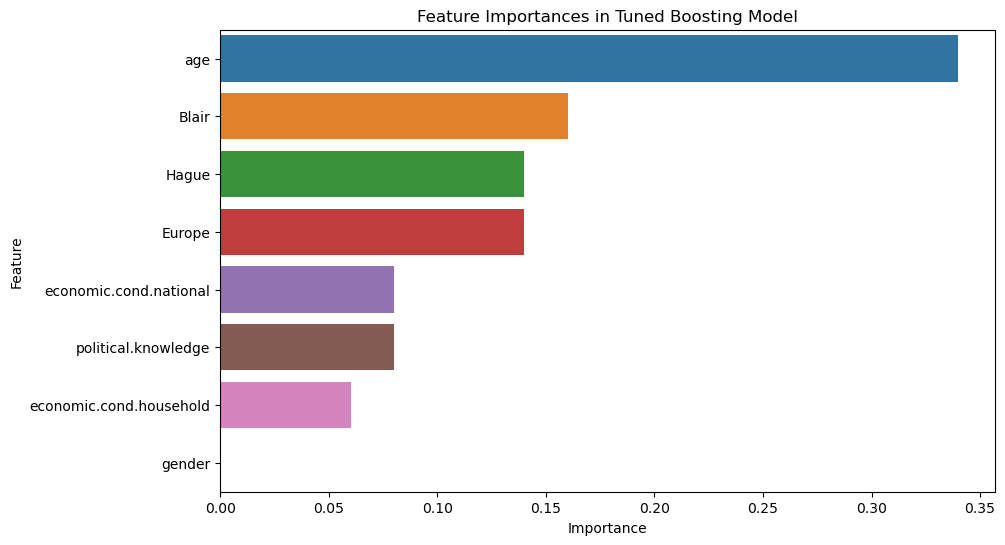

In [21]:
# Feature importances in the final model
feature_importances = best_boosting.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Tuned Boosting Model')
plt.show()


### Inferences from Feature Importances(from the Feature Importance Plot):

#### Age:
- **Importance**: The most critical feature in the model, with an importance score significantly higher than other features.
- **Inference**: Age likely plays a crucial role in determining voting preferences. Older or younger age groups might have distinct voting behaviors. Understanding how age impacts voting decisions can help tailor campaign strategies to different demographics.

#### Blair:
- **Importance**: Second most important feature.
- **Inference**: This might indicate the influence of political figures or past leadership on current voting preferences. Voters might be swayed by their approval or disapproval of Blair's policies or leadership style.

#### Hague:
- **Importance**: Third most important feature.
- **Inference**: Similar to Blair, the impact of political figures on voter sentiment can be significant. This suggests that perceptions or opinions about Hague are strong determinants of voting choices.

#### Europe:
- **Importance**: Fourth most important feature.
- **Inference**: The issue of Europe (potentially relating to policies on the EU, Brexit, etc.) is a significant factor in voting behavior. Voters’ attitudes towards Europe-related policies could be decisive in their voting decisions.

#### Economic Conditions (National and Household):
- **Importance**: Both features have moderate importance.
- **Inference**: Economic conditions, both at the national level and within households, influence voting behavior. Economic factors are always a vital consideration for voters, affecting how they perceive parties' abilities to manage the economy.

#### Political Knowledge:
- **Importance**: Moderately important.
- **Inference**: Voters with varying levels of political knowledge might have different priorities or understanding of policies, affecting their voting choices. Engaging with voters to enhance their political knowledge could influence voting behavior.

#### Gender:
- **Importance**: Least important among the features listed.
- **Inference**: While gender has some influence, it might not be as significant as other factors in determining voting behavior in this particular dataset. However, it still warrants consideration in broader analyses.


## Actionable Insights & Recommendations

- ### Compare all four models

#### Model Comparison Summary:

#### KNN
- Training Accuracy: 0.878
- Testing Accuracy: 0.767
- Confusion Matrix:
    [[ 53  36]
    [ 35 181]]
- Classification Report:
    - Precision (0): 0.60
    - Precision (1): 0.83
    - Recall (0): 0.60
    - Recall (1): 0.84
    - F1-Score (0): 0.60
    - F1-Score (1): 0.84
- AUC: 0.80
- **Overall Performance:** Good at identifying true positives but has a trade-off with false positives.

#### Naive Bayes
- Training Accuracy: 0.842
- Testing Accuracy: 0.797
- Confusion Matrix:
    [[ 57  32]
    [ 30 186]]
- Classification Report:
    - Precision (0): 0.66
    - Precision (1): 0.85
    - Recall (0): 0.64
    - Recall (1): 0.86
    - F1-Score (0): 0.65
    - F1-Score (1): 0.86
- AUC: 0.85
- **Overall Performance:** Very effective in distinguishing classes with a good balance between precision and recall.

#### Tuned Bagging
- Training Accuracy: 0.958
- Testing Accuracy: 0.807
- Confusion Matrix:
    [[ 51  38]
    [ 21 195]]
- Classification Report:
    - Precision (0): 0.71
    - Precision (1): 0.84
    - Recall (0): 0.57
    - Recall (1): 0.90
    - F1-Score (0): 0.63
    - F1-Score (1): 0.87
- AUC: 0.86
- **Overall Performance:** High ability to distinguish classes; good performance with a low false positive rate.

#### Tuned Boosting
- Training Accuracy: 0.854
- Testing Accuracy: 0.807
- Confusion Matrix:
    [[ 55  34]
    [ 25 191]]
- Classification Report:
    - Precision (0): 0.69
    - Precision (1): 0.85
    - Recall (0): 0.62
    - Recall (1): 0.88
    - F1-Score (0): 0.65
    - F1-Score (1): 0.87
- AUC: 0.86
- **Overall Performance:** Comparable to Tuned Bagging; good performance with a low false positive rate.

#### Comparative Analysis:

- **Accuracy:**
    - Highest Training Accuracy: Tuned Bagging (0.958)
    - Highest Testing Accuracy: Tuned Bagging and Tuned Boosting (0.807)
    - Lowest Testing Accuracy: KNN (0.767)

- **AUC (Area Under the Curve):**
    - Highest AUC: Tuned Bagging and Tuned Boosting (0.86)
    - Lowest AUC: KNN (0.80)
- **Precision and Recall:**
    - Best Precision for Class 0: Tuned Bagging (0.71)
    - Best Precision for Class 1: Naive Bayes (0.85) and Tuned Boosting (0.85)
    - Best Recall for Class 0: Naive Bayes (0.64)
    - Best Recall for Class 1: Tuned Bagging (0.90)
- **F1-Score:**
    - Best F1-Score for Class 0: Tuned Bagging (0.63)
    - Best F1-Score for Class 1: Naive Bayes (0.86) and Tuned Boosting (0.87)

#### Overall Performance Summary:
- **Tuned Bagging** stands out with the highest training accuracy and AUC, indicating it has a strong ability to distinguish between classes while maintaining a good balance between precision and recall.
- **Tuned Boosting** performs similarly to Tuned Bagging but with slightly lower training accuracy, making it a strong contender.
- **Naive Bayes** offers a good balance in precision and recall, especially for class 1, but has lower overall accuracy compared to the tuned models.
- **KNN** has the lowest testing accuracy and AUC, indicating it may not be as effective for this dataset compared to the others.

#### Conclusion:
Based on the above metrics, Tuned Bagging and Tuned Boosting are the most effective models for this dataset, with Naive Bayes being a solid choice for specific use cases where class 1 precision is critical. KNN may require further tuning or consideration of different features to improve performance.

- ### Conclude with the key takeaways for the business

- #### Final Model:
    Tuned Boosting Model, this model has the best overall performance, making it the most reliable for predicting election outcomes.

- #### Key Feature:
    - age
    - Blair
    - Hague
    - Europe
    - economic.cond.national
    - political.knowledge
    - economic.cond.household
    - gender

- #### Based on the features and its importaces Recommendations for Political Strategy are made as follows:


    - **Targeted Campaigns:** Focus on age-specific campaigns, considering that age is a pivotal determinant. Understanding the needs and priorities of different age groups could optimize engagement strategies.

    - **Leverage Political Figures:** Use endorsements or criticism from prominent figures like Blair and Hague effectively. Highlighting successful policies or critiquing past failures could resonate with specific voter segments.

    - **Economic Messaging:** Craft clear messages about economic policies. Emphasizing plans to improve national and household economic conditions could be persuasive for undecided voters.

    - **Address European Issues:** Formulate a clear stance on Europe-related policies. Given the importance of this feature, having a definitive and appealing position could sway voters.

    - **Educate and Engage:** Increase efforts to educate the electorate, enhancing political knowledge, which could empower voters to make informed choices aligned with your party's policies.

    These insights could help in developing more effective, data-driven strategies to influence voter behavior and improve electoral success.


## Problem 2 - Define the problem and Perform Exploratory Data Analysis

### Problem Definition

The goal of this project is to analyze the inaugural speeches of three U.S. Presidents
- Franklin D. Roosevelt (1941)
- John F. Kennedy (1961)
- Richard Nixon (1973) 

Using the NLTK library in Python. We will examine the linguistic patterns, themes, and rhetorical strategies employed in these speeches to gain insights into how each president communicated their messages and engaged with the public during their respective eras. The analysis will focus on understanding the historical context, identifying key themes, and assessing the emotional tone of the speeches.

In [22]:
# Read Dataset
data = pd.read_excel("Project_Speech.xlsx")
data.head()

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


### Find the number of Character, words & sentences in all three speeches.

In [23]:
import re

# Function to count characters, words, and sentences
def count_characters(text):
    return len(text)

def count_words(text):
    return len(text.split())

def count_sentences(text):
    return len(re.split(r'[.!?]+', text))

# Apply the functions to each speech
data['Num_Characters'] = data['Speech'].apply(count_characters)
data['Num_Words'] = data['Speech'].apply(count_words)
data['Num_Sentences'] = data['Speech'].apply(count_sentences)

# Display the results
data[['Name', 'Num_Characters', 'Num_Words', 'Num_Sentences']]

,Name,Num_Characters,Num_Words,Num_Sentences
0,Roosevelt,7651,1323,69
1,Kennedy,7673,1364,56
2,Nixon,10106,1769,73


#### Roosevelt's Speech:

Characters: 7,651
Words: 1,323
Sentences: 69

#### Kennedy's Speech:

Characters: 7,673
Words: 1,364
Sentences: 56

#### Nixon's Speech:

Characters: 10,106
Words: 1,769
Sentences: 73

## Problem 2 - Text cleaning

#### Removing Punctuation, special characters & newline characters

- While Examining the speech provided in the data i found that it has lot of newline charater "\n", "\" & other special characters.
- So, we check & remove Punctuations, special characters, newline characters & extra space.
- Note: We do not have to remove numbers.

In [24]:
def clean_speech(speech):
    # Replace newline characters with a space
    speech = speech.replace('\n', ' ')
    
    # Remove punctuation and special characters, keep letters and numbers
    speech = re.sub(r'[^\w\s]', '', speech)
    
    # Remove extra spaces
    speech = re.sub(r'\s+', ' ', speech).strip()
    return speech

data['Cleaned_speech'] = data['Speech'].apply(clean_speech)
data.head()

,Name,Speech,Num_Characters,Num_Words,Num_Sentences,Cleaned_speech
0,Roosevelt,On each national day of inauguration since 178...,7651,1323,69,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7673,1364,56,Vice President Johnson Mr Speaker Mr Chief Jus...
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10106,1769,73,Mr Vice President Mr Speaker Mr Chief Justice ...


In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

# Ensure the necessary NLTK packages are downloaded
nltk.download('stopwords')

def custom_word_tokenize(text):
    # Simple tokenization by splitting on whitespace and removing punctuation
    return re.findall(r'\b\w+\b', text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sjaigu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Stopword removal

- Stopwords are common words that often carry less meaning, such as "the," "is," and "and." Removing these words helps focus on more meaningful words.

In [29]:
# Define a function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = custom_word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply stopword removal to each speech
data['Speech_No_Stopwords'] = data['Speech'].apply(remove_stopwords)

data.head()

,Name,Speech,Num_Characters,Num_Words,Num_Sentences,Cleaned_speech,Speech_No_Stopwords
0,Roosevelt,On each national day of inauguration since 178...,7651,1323,69,On each national day of inauguration since 178...,national day inauguration since 1789 people re...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7673,1364,56,Vice President Johnson Mr Speaker Mr Chief Jus...,Vice President Johnson Mr Speaker Mr Chief Jus...
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10106,1769,73,Mr Vice President Mr Speaker Mr Chief Justice ...,Mr Vice President Mr Speaker Mr Chief Justice ...


### Stemming 

- Reduce words to their root forms using stemming.

In [30]:
from nltk.stem import PorterStemmer

# Define a function to stem words
def stem_words(text):
    stemmer = PorterStemmer()
    words = custom_word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply stemming to each speech
data['Speech_Stemmed'] = data['Speech_No_Stopwords'].apply(stem_words)
data.head()

,Name,Speech,Num_Characters,Num_Words,Num_Sentences,Cleaned_speech,Speech_No_Stopwords,Speech_Stemmed
0,Roosevelt,On each national day of inauguration since 178...,7651,1323,69,On each national day of inauguration since 178...,national day inauguration since 1789 people re...,nation day inaugur sinc 1789 peopl renew sens ...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7673,1364,56,Vice President Johnson Mr Speaker Mr Chief Jus...,Vice President Johnson Mr Speaker Mr Chief Jus...,vice presid johnson mr speaker mr chief justic...
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10106,1769,73,Mr Vice President Mr Speaker Mr Chief Justice ...,Mr Vice President Mr Speaker Mr Chief Justice ...,mr vice presid mr speaker mr chief justic sena...


### Find the 3 most common words used in all three speeches

In [31]:
# 3 Most Common word in the three speechs individually.

def most_common_words(text, n=3):
    words = custom_word_tokenize(text)
    word_counts = Counter(words)
    return word_counts.most_common(n)

# Apply the function to each cleaned speech
data['Most_Common_Words'] = data['Speech_Stemmed'].apply(most_common_words)

# Display the results
data[['Name', 'Most_Common_Words']]

,Name,Most_Common_Words
0,Roosevelt,"[(n, 38), (nation, 17), (know, 10)]"
1,Kennedy,"[(n, 27), (us, 12), (let, 11)]"
2,Nixon,"[(n, 51), (us, 26), (america, 20)]"


In [32]:
# 3 Most Common word in the three speechs Combined.

# Combine all speeches into one string
combined_speeches = ' '.join(data['Speech_Stemmed'])

# Clean the combined text by removing punctuation and converting to lowercase
cleaned_combined_speeches = combined_speeches.lower()

# Tokenize the cleaned text into words
words = cleaned_combined_speeches.split()

# Count the frequency of each word
word_counts = Counter(words)

# Find the 3 most common words based on the its frequency
most_common_words = word_counts.most_common(3)

most_common_words

[('n', 116), ('us', 46), ('nation', 40)]

## Problem 2 - Plot Word cloud of all three speeches

### Show the most common words used in all three speeches in the form of word clouds

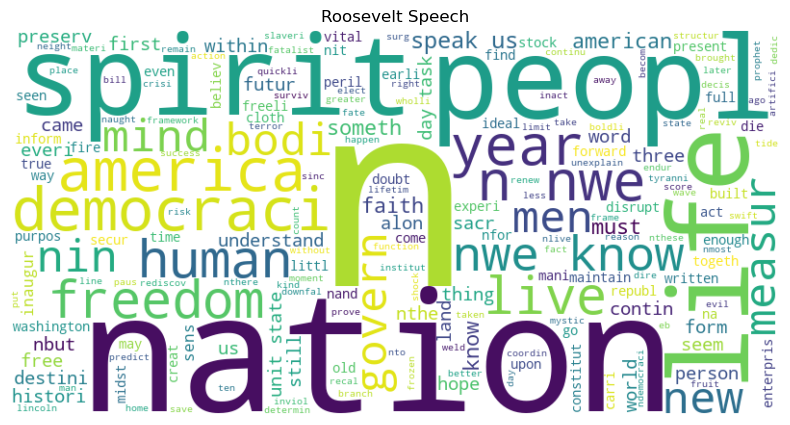

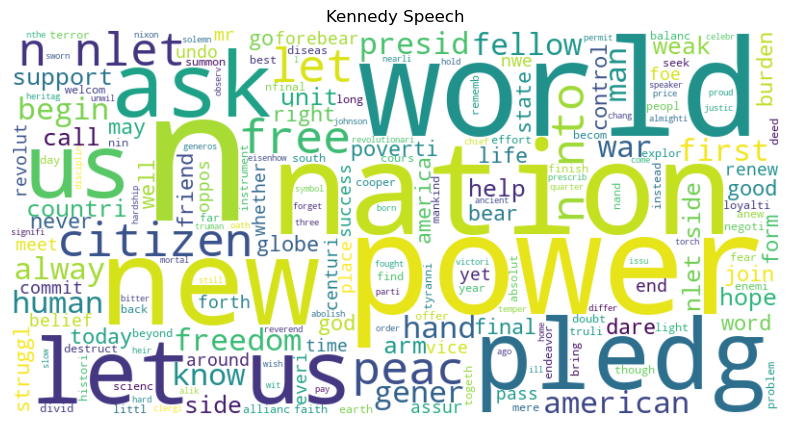

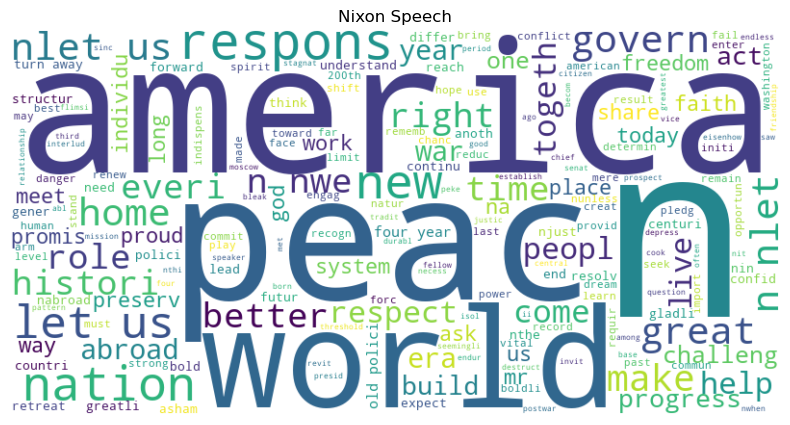

In [33]:
#!pip install wordcloud matplotlib

# 3 Most Common word in the three speechs individually.

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define a function to generate a word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plot word clouds for each speech
for index, row in data.iterrows():
    plot_wordcloud(row['Speech_Stemmed'], f"{row['Name']} Speech")


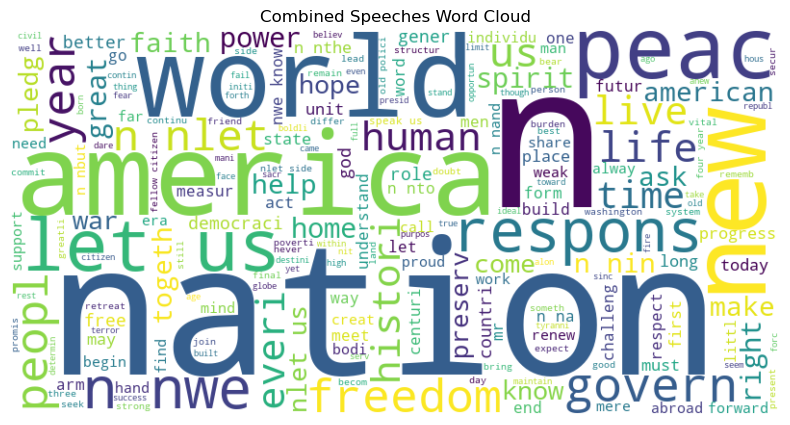

In [83]:

# 3 Most Common word in the three speechs individually.

# Define a function to generate a word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Combine all speeches into a single string
combined_speech = ' '.join(data['Speech_Stemmed'])

# Plot the word cloud for the combined speeches
plot_wordcloud(combined_speech, "Combined Speeches Word Cloud")
